In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

Read the file and separate all the fields

Read u.item file

In [2]:
movielist = sc.textFile("../data/raw/Datasets/ml-100k/u.item")
print(movielist)

../data/raw/Datasets/ml-100k/u.item MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0


movielist, split separate by "|"

In [4]:
movies = movielist.map(lambda line: line.split("|"))

Calculate the stastistics

In [5]:
num_movie = movielist.map(lambda fields: fields[0]).count()
print("Number of Movie : " + str(num_movie))

Number of Movie : 1682


first field of movielist records

In [6]:
print("First record : " +format(movies.first()))

First record : ['1', 'Toy Story (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


the first 5 records of movielist records

In [7]:
print("First 5 record : " +format(movies.take(5)))

First 5 record : [['1', 'Toy Story (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['2', 'GoldenEye (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?GoldenEye%20(1995)', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0'], ['3', 'Four Rooms (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0'], ['4', 'Get Shorty (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['5', 'Copycat (1995)', '01-Jan-1995', '', 'http://us.imdb.com/M/title-exact?Copycat%20(1995)', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0

 Calculate Movies of year X

In [8]:
# Define the convert_year function
def convert_year(x):
     try:
       return int(x[-4:])
     except:
       return 0

In [10]:
movies_by_year = movies.map(lambda m: (convert_year(m[2]), 1)).filter(lambda t: t[0] != 0)\
.reduceByKey(lambda a, b: a + b).sortByKey()

print("Movies by year : " + format(movies_by_year.collect()))


Movies by year : [(1922, 1), (1926, 1), (1930, 1), (1931, 1), (1932, 1), (1933, 2), (1934, 4), (1935, 4), (1936, 2), (1937, 4), (1938, 3), (1939, 7), (1940, 8), (1941, 5), (1942, 2), (1943, 4), (1944, 5), (1945, 4), (1946, 5), (1947, 5), (1948, 3), (1949, 4), (1950, 7), (1951, 5), (1952, 3), (1953, 2), (1954, 7), (1955, 5), (1956, 4), (1957, 8), (1958, 9), (1959, 4), (1960, 5), (1961, 3), (1962, 5), (1963, 6), (1964, 2), (1965, 5), (1966, 2), (1967, 5), (1968, 6), (1969, 4), (1970, 3), (1971, 7), (1972, 3), (1973, 4), (1974, 8), (1975, 6), (1976, 5), (1977, 4), (1978, 4), (1979, 9), (1980, 8), (1981, 12), (1982, 13), (1983, 5), (1984, 8), (1985, 7), (1986, 15), (1987, 13), (1988, 11), (1989, 15), (1990, 24), (1991, 22), (1992, 37), (1993, 126), (1994, 214), (1995, 219), (1996, 355), (1997, 286), (1998, 65)]


movies number of year 1994

In [11]:
print("movies number of year: " + format(movies_by_year.filter(lambda t: t[0] == 1994).collect()))

movies number of year: [(1994, 214)]


Maximun movies/year:

In [12]:
print("Maximum movies/year: " + format(movies_by_year.max(lambda t: t[1])))

Maximum movies/year: (1996, 355)


Minimum movies/year:

In [13]:
print("Minimum movies/year: " + format(movies_by_year.min(lambda t: t[1])))

Minimum movies/year: (1922, 1)


Average Movie/year

In [14]:
print("Average movies/year: " + format(movies_by_year.values().mean()))

Average movies/year: 23.67605633802817


Standar Deviation Movie/year

In [21]:
print("Standar Deviation movies/year: " + format(movies_by_year.values().stdev()))

Standar Deviation movies/year: 63.553409865830886


Plot the number of Movie/year

In [15]:
import matplotlib.pyplot as plt

year  = movies_by_year.keys().collect()
num_movie = list(map(int, movies_by_year.values().collect()))

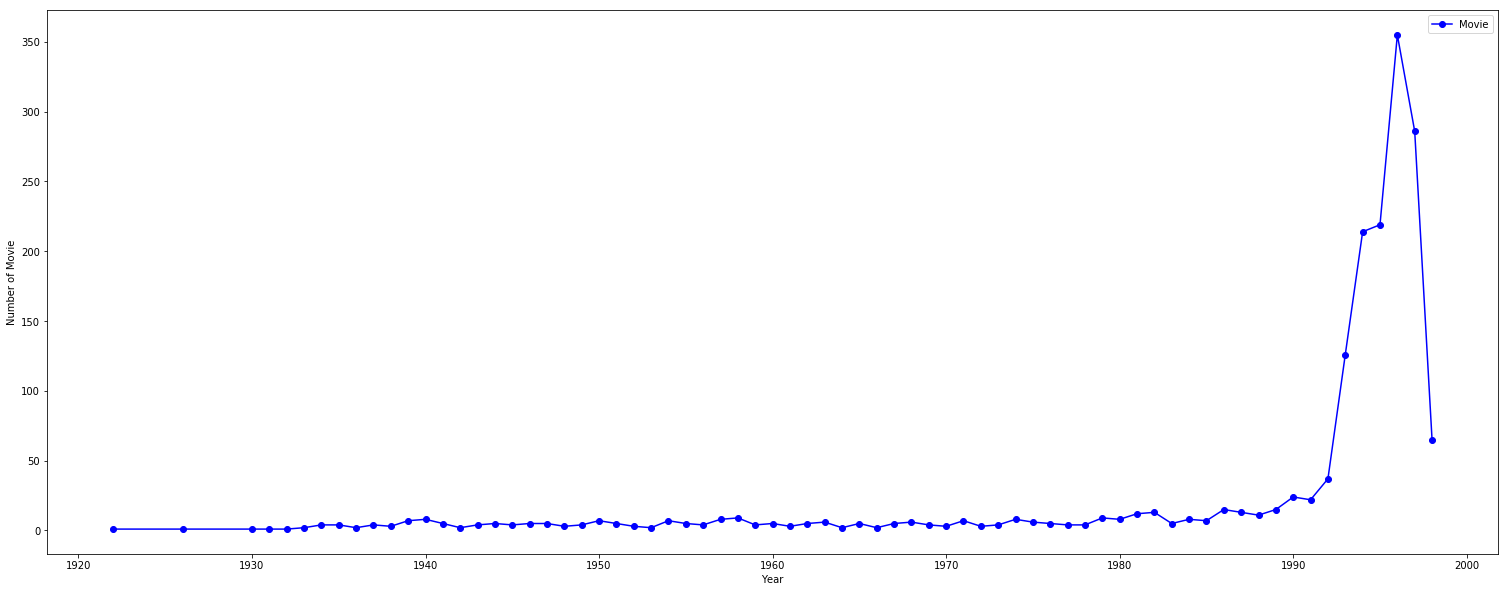

In [16]:
# plotting using normal plot
plt.plot(year, num_movie, 'o-', label="Movie", color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Movie")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(26, 10)

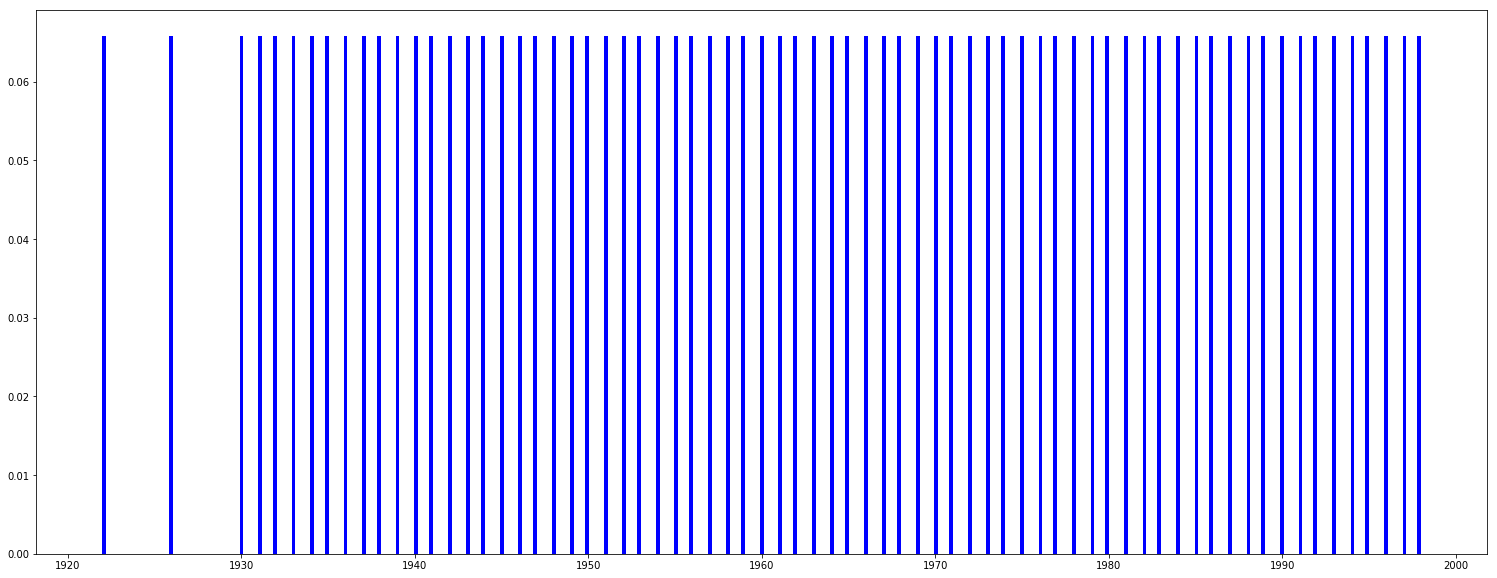

In [17]:
# plotting using histogram
plt.hist(year, bins=int((max(num_movie)-min(num_movie))+1), color='blue', density=True)

fig = plt.gcf()
fig.set_size_inches(26, 10)

partitions

Get the Dataset's automatic number of partitions

In [18]:
print("partitions Numbers" +format(movies_by_year.getNumPartitions()))

partitions Numbers1



Change the number of partitions to 10


In [19]:
movies_by_year = movies_by_year.repartition(10)
print("New Numbers partitions " +format(movies_by_year.getNumPartitions()))


New Numbers partitions 10
